<a href="https://colab.research.google.com/github/hnguyen199/co2emissions/blob/main/Harold_Nguyen_MATH_2315_Lab_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Imports

In [ ]:
# Import pandas, numpy, and matplotlib
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# seaborn is a data visualization library built on matplotlib
import seaborn as sns 

# set the plotting style 
sns.set_style("whitegrid")

# Plot missing values
import missingno as msno

## Lab introduction

In this Colab notebook, I will address the issue of CO2 emissions throughout the last decades. As we can see, in the world around us, there have been more frequent changes to climate change, which has affected the lives of millions across the globe. This change in climate change is because of the factors of CO2 emissions. In seeing the problem, the notebook will display valuable insight into the problem of CO2 emissions and represent certain countries and their input to the emissions that occur within the world. Using the dataset, we can display multiple graphs and explanations for the existence of climate change and its negative effects. 

Use the greenhouse gas emission data set owid-co2-data.csv from Our World in Data to describe how the emission levels of the current top 10 CO2 emitters have changed over the last 50 years (1971 - 2020). 



## Import and set up the data set

I will use the data from the file "owid-co2-data.csv" from https://github.com/owid/co2-data. This file will be used throughout the Colab notebook as a reference to where the information will be coming from. The dataset throughout the notebook will highlight insight and specifies certain areas throughout the issue of CO2 emission.  

##### $\rightarrow$ Use Pandas to load the file `owid-co2-data.csv` from https://github.com/owid/co2-data as a `DataFrame`. Name the `DataFrame` `df`.

##### Solution

In [ ]:
#Used to import the data into the program, and used as a reference to anaylze co2 data
df = pd.read_csv('https://raw.githubusercontent.com/owid/co2-data/master/owid-co2-data.csv')

In [ ]:
type(df)

pandas.core.frame.DataFrame

Consult the [codebook](https://github.com/owid/co2-data/blob/master/owid-co2-codebook.csv) to see the description of each column.



##### $\rightarrow$ Select the rows corresponding to individual countries 

The `country` column of the data set contains some values that are groups of countries. We will remove these observations from the data set.

In [ ]:
#Used to isolate certain data that is not needed in explaining our data. In this case useless data that has no affect to what we are looking at
non_countries = ['Africa', 'Africa (GCP)', 'Asia', 'Asia (GCP)', 'Asia (excl. China and India)', 'Central America (GCP)',
                  'EU-27', 'Europe', 'Europe (excl. EU-27)', 'European Union (27) (GCP)', 'Europe (GCP)',
                  'Europe (excl. EU-28)', 'European Union (27)', 
                  'European Union (28)', 'French Equatorial Africa', 
                  'French Guiana', 'French Polynesia', 'French West Africa',
                  'High-income countries', 'International transport', 
                  'Low-income countries', 'Lower-middle-income countries', 'Mayotte', 'Middle East (GCP)',
                  'Non-OECD (GCP)',
                  'North America',  'North America (excl. USA)', 'North America (GCP)',
                  'Oceania (GCP)', 'OECD (GCP)', 
                  'Panama Canal Zone','South America', 'South America (GCP)', 'Upper-middle-income countries', 
                  'World']

In [ ]:
#Performing "isin" and making it False allows us to remove the data written above out of our data.
df = df.loc[df['country'].isin(non_countries) == False]

Remove the rows corresponding to the non-countries.

## Explore the data set

##### $\rightarrow$ Display the head of the data frame

In [ ]:
#Command performed is used to list the given data we want.
df.head()

,country,year,iso_code,population,gdp,cement_co2,cement_co2_per_capita,co2,co2_growth_abs,co2_growth_prct,...,share_global_cumulative_other_co2,share_global_flaring_co2,share_global_gas_co2,share_global_luc_co2,share_global_oil_co2,share_global_other_co2,total_ghg,total_ghg_excluding_lucf,trade_co2,trade_co2_share
0,Afghanistan,1850,AFG,3752993.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,0.121,NaN,NaN,NaN,NaN,NaN,NaN
1,Afghanistan,1851,AFG,3769828.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,0.118,NaN,NaN,NaN,NaN,NaN,NaN
2,Afghanistan,1852,AFG,3787706.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,0.116,NaN,NaN,NaN,NaN,NaN,NaN
3,Afghanistan,1853,AFG,3806634.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,0.115,NaN,NaN,NaN,NaN,NaN,NaN
4,Afghanistan,1854,AFG,3825655.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,0.114,NaN,NaN,NaN,NaN,NaN,NaN


##### Solution

##### $\rightarrow$ Use the `info` method further explore the data.
1.  Are there any columns where the data type is obviously incorrect? For example, is there a variable that should be a number, but is coded as a string?
2.  Do any of the columns have missing (null) values?

In [ ]:
#Using info will allow us to look at each columns and look for any incorrect variables that do not belong or that of a string.
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 39638 entries, 0 to 46522
Data columns (total 74 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   country                                    39638 non-null  object 
 1   year                                       39638 non-null  int64  
 2   iso_code                                   39251 non-null  object 
 3   population                                 36053 non-null  float64
 4   gdp                                        14535 non-null  float64
 5   cement_co2                                 20333 non-null  float64
 6   cement_co2_per_capita                      19018 non-null  float64
 7   co2                                        24464 non-null  float64
 8   co2_growth_abs                             23971 non-null  float64
 9   co2_growth_prct                            21484 non-null  float64
 10  co2_including_luc     

In [ ]:
#Doing isna in sum will also allow us to look at the difference in the total number count
df.isna().sum()

country                         0
year                            0
iso_code                      387
population                   3585
gdp                         25103
                            ...  
share_global_other_co2      38018
total_ghg                   33819
total_ghg_excluding_lucf    33819
trade_co2                   35908
trade_co2_share             35909
Length: 74, dtype: int64

##### Solution

1. There are no columns where the data type is incorrect. From using the command we can see that stands to be true as the command highlights each column with a description of its non-null, and Dtype. Looking at the Dtype, we can see that there is no string that stands out in our data set.
2. Yes, every row except country and year has missing valued compared to the RangeIndex: 46523. As the RangeIndex is given from the command, we can look from two ways, the value of each non-null in each column either has 46523 or not. If it doesn't, this means that there are missing values in the other columns. The second way we can look at it is through the command 'isna." This command allows us to see the difference in the Rangeindex, which, as shown, only country and year possess all of the RangeIndex.



##### $\rightarrow$ What years are present in the data set?

In [ ]:
#Asking for a specific coloumn, 'year,' will gives us a list of the range of the data set.
df['year']

0        1850
1        1851
2        1852
3        1853
4        1854
         ... 
46518    2017
46519    2018
46520    2019
46521    2020
46522    2021
Name: year, Length: 39638, dtype: int64

##### Solution

From 1850 to 2021. Using this command, we can specify the year alone and see where it starts and where it ends. 

## Analysis of top emissions in 2020

##### $\rightarrow$ Find the top 10 emitters of total CO$_2$ in 2020.



In [ ]:
#First command allows us to specify the data at the year 2020
df_2020 = df[df['year'] == 2020]
#Using this command groups the data in each country and finding the sum of the CO2 emissions
grouped_df = df_2020.groupby('country')['co2'].sum()
#Rearrange the data of CO2 emission in decending order by making it FALSE
sorted_df = grouped_df.sort_values(ascending=False)
#Allows us to rearrange our data from highlest to lowest in values
top_10_emitters = sorted_df.head(10)


In [ ]:
#Using print will allow us to show the command from above into a list from highest to lowest of emmitters
print(top_10_emitters)

country
China            10956.213
United States     4715.691
India             2445.012
Russia            1624.221
Japan             1042.224
Iran               729.978
Saudi Arabia       661.193
Germany            639.381
Indonesia          609.786
South Korea        597.634
Name: co2, dtype: float64


##### Solution

The top 10 emitters start from China the highest, United States, India, Russia, Japan, Iran, Saudi Arabia, Germany, Indonesia, and ends to South Korea. In performing the command of specifying, grouping, and rearranging, we hone on the specifics of the top 10 emitters.    

##### $\rightarrow$ Make a histogram of total CO$_2$ emissions in 2020. Make the plot on a density scale.

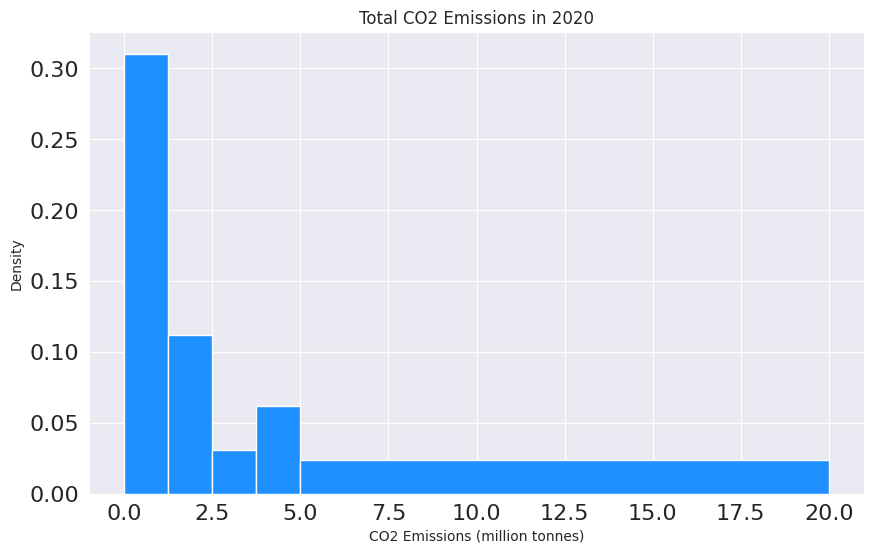

In [ ]:
#Filters the dataframe that pertains to the year of 2020
df2020 = df[df['year'] == 2020]

#Produce the histogram
plt.figure(figsize=(10, 6))
sns.histplot(data = df[df['year'] == 2020], x = 'co2', 
             bins = np.r_[np.linspace(0, 5, 5), 20], color = 'dodgerblue', alpha = 1, stat = 'density')

#Add labels and titles to the axis
plt.title('Total CO2 Emissions in 2020')
plt.xlabel('CO2 Emissions (million tonnes)')
plt.ylabel('Density')

#Set sizes of tick labels
plt.tick_params(labelsize = 16);


##### Solution

In performance making our histogram, the purpose of the histogram as a density for CO2 emissions allows us to see the distribution of the emissions within the given dataset. Looking at our bins, we can see the drop off in the value in density and where it is positioned on the graph as this graph allows us to pinpoint the areas of higher versus lower density values. 

##### $\rightarrow$ Make a boxplot of total CO$_2$ emissions in 2020. Add a strip plot on top of the boxplot.

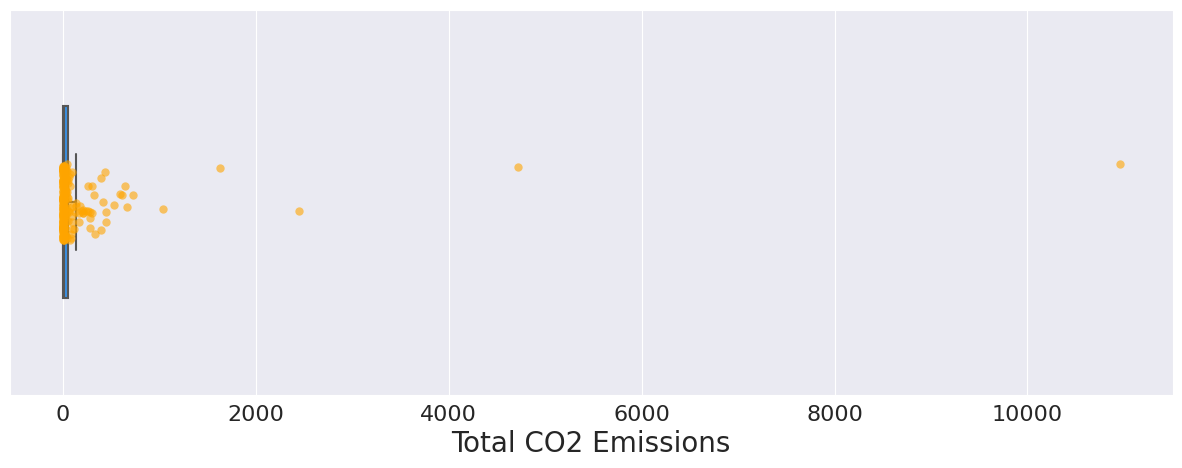

In [ ]:
#The size of the graph 
plt.figure(figsize = (15,5))
#Create the boxplot
sns.boxplot(data = df2020, x = 'co2', color = 'dodgerblue', width = 0.5, fliersize = 0)
#Adding the strip plot within our boxplot
sns.stripplot(data = df2020, x = 'co2', color = 'orange', size = 6, alpha = 0.6)
#Label axes
plt.xlabel('Total CO2 Emissions', fontsize = 20)

#Set sizes of tick labels
plt.tick_params(labelsize = 16)


##### Solution

Using this command at which, making a boxplot and adding a strip plot to the top gives us another way to look at the distribution of the total CO2 emissions over time. The usage of the strip plot separates the information into one variable is categorical, and the other is numerical. The graph shows the 5-number summary of distribution: the quartiles, minimum, and maximum, which helps isolates the median and specifics within the dataset. 

##### $\rightarrow$ Are the CO$_2$ emissions of the top 10 emitters in 2020 outliers in the distribution?

In [ ]:
#Rearranges the dataset from CO2 emissions in decending order and taking the top 10 values/countries
top_10_emitters = df_2020.sort_values(by='co2', ascending=False).head(10)

In [ ]:
#Calculates the mean and standard deviation for all within the year of 2020
mean = df_2020['co2'].mean()
std = df_2020['co2'].std()

print(f"Mean: {mean:.2f}")
print(f"Standard Deviation: {std:.2f}")

Mean: 160.26
Standard Deviation: 836.58


In [ ]:
#Command allows us to specify if the data set is an outlier or not
for index, row in top_10_emitters.iterrows():
    z_score = (row['co2'] - mean) / std
    if abs(z_score) > 3:
        outliers.append(row['country'])

#Presents the command froma bove and tell us whether it is an outlier or not
if len(outliers) > 0:
    print("Yes, outliers")
else:
    print("No")

Yes, outliers


##### Solution

In addressing the issue to see if the top 10 emitters of the year 2020 in the distribution is an outlier, we find out that yes, it is. We can also make this assumption since China alone takes most of the total CO2 emissions. Using the mean and standard deviation in compliance with the z-scores, we find that statement to be true. As such, it makes sense as we already know the consensus that CO2 emissions have increased over the last century, and it makes sense why it makes it an outlier. 

## Emission trend over time

##### $\rightarrow$ Is the data set missing any CO$_2$ emission values for the top 10 emitters in 2020 over the years 1971 to 2020?

In [197]:
#Command will specify the year between 1971 to 2020 as its focal point
df = df[(df['year'] >= 1971) & (df['year'] <= 2020)]

#Looking to see if any CO2 emissions values are missions within each top 10 emitters
for index, row in top_10_emitters.iterrows():
    country = row['country']

#Using if and else will tell us whether the data we looked at will have any values that are missing in the data set
    if df[df['country'] == country]['co2'].isnull().values.any():
        print(f"{country}: Missing")
    else:
        print(f"{country}: Present")

China: Present
United States: Present
India: Present
Russia: Present
Japan: Present
Iran: Present
Saudi Arabia: Present
Germany: Present
Indonesia: Present
South Korea: Present


##### Solution

The code above checks whether the top 10 CO2 emitters in the year 2020 have CO2 emission data available for all the years between 1971 and 2020. This can be checked by selecting the top 10 emitters for the year 2020 within the time frame of 1971-2020. The command looks for any null values that are present or not. In doing so, the command states, "Present," and if CO2 emission values are missing for a country, the code prints "Missing."

##### $\rightarrow$ Plot the time plot of the total CO$_2$ emissions from 1971 to 2020 for the top 10 emitters in 2020.

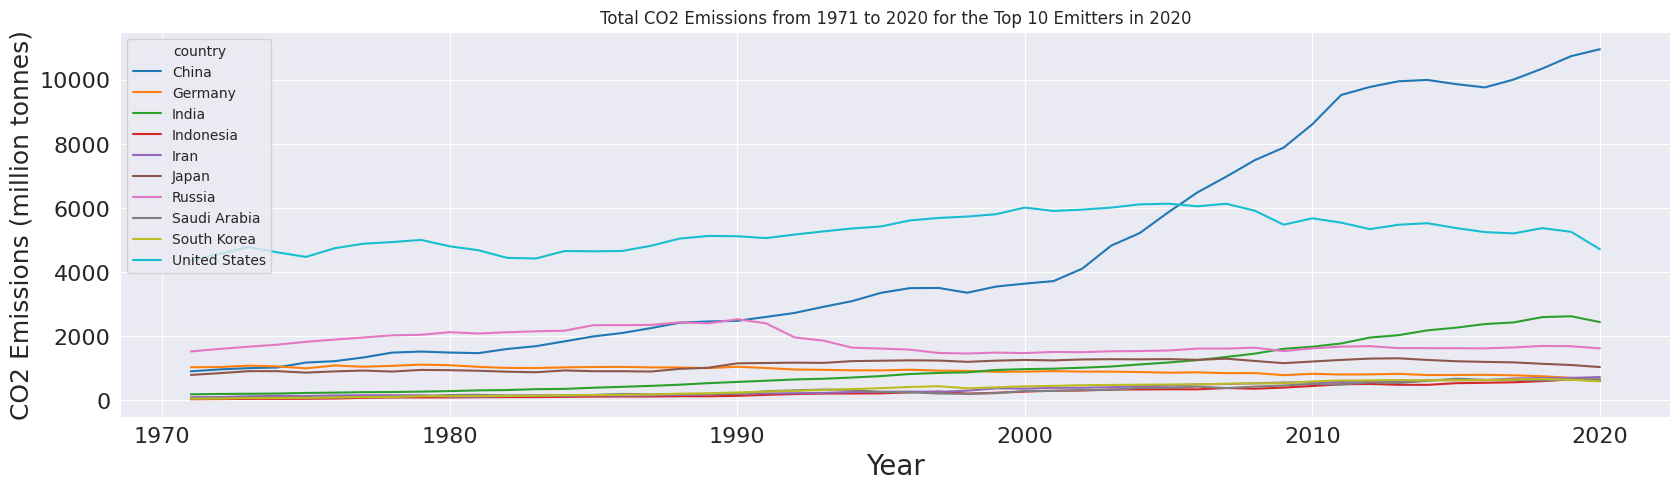

In [198]:
#Using filter allows us to hone on the data set between 1971 to 2020 within the top 10 emitters of the year 2020 
df_filtered = df[(df['country'].isin(countries)) & (df['year'] >= 1971) & (df['year'] <= 2020)]

#Plotting the time plot
plt.figure(figsize=(20,5))
sns.lineplot(data=df_filtered, x='year', y='co2', hue='country')

#Labeling the x, y axis and title
plt.xlabel('Year', fontsize = 20)
plt.ylabel('CO2 Emissions (million tonnes)', fontsize = 18)
plt.title('Total CO2 Emissions from 1971 to 2020 for the Top 10 Emitters in 2020')
plt.tick_params(labelsize = 16)


##### Solution

Using the time plot, we can see the timeline at which the levels of CO2 emission increase or decrease as time goes on. From the graph, we see that China alone between 1971 to about 1990 was around every other country in CO2 emissions levels. Eventually, we see China spike a large increase in CO2 emissions in the last decades at an alarming rate. In addition, the US has been the second highest with a stagnant line throughout the years. We can also see a dip in the year 2020, in which a decent drop in CO2 emissions fall within the US time plot near the year 2020. Overall, every other country has stood relatively low throughout the years. 

##### $\rightarrow$ Again, plot the time plot of the total CO$_2$ emissions from 1971 to 2020 for the top 10 emitters in 2020, but now also include a plot of the mean total CO$_2$ emissions over all countries on the same plot.

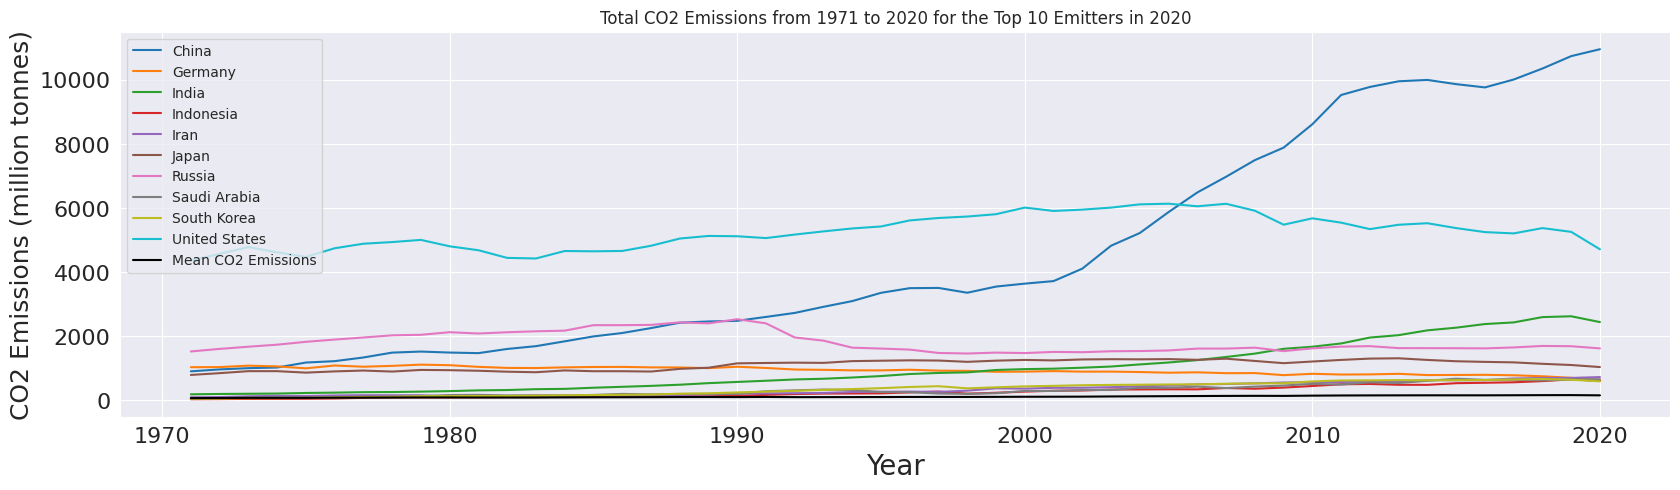

In [199]:
#First calculating the mean CO2 emissions over all countries for each year
mean_co2 = df.groupby('year').agg({'co2': 'mean'}).reset_index()

#Plotting the time plot
plt.figure(figsize=(20,5))
sns.lineplot(data=df_filtered, x='year', y='co2', hue='country')
sns.lineplot(data=mean_co2, x='year', y='co2', color='black', label='Mean CO2 Emissions')

# Labeling the x, y axis and title
plt.xlabel('Year', fontsize = 20)
plt.ylabel('CO2 Emissions (million tonnes)', fontsize = 18)
plt.title('Total CO2 Emissions from 1971 to 2020 for the Top 10 Emitters in 2020')
plt.tick_params(labelsize = 16)
plt.legend()

##### Solution

When adding the plot of the mean total CO2 emissions over all countries on the same plot, we can see that the mean is much lower. This makes sense since the mean represents the average of all countries within the data set. Although the dataset for the year 2020, the top 10 emitters produce large amounts of CO2 emissions, all other countries, like South Korea, Germany, etc., bring the mean down compared to the top emitters like China. 

##### $\rightarrow$ Given the large difference between the smallest and largest values, it can help to plot the results on a log scale. Produce the plot of the top 10 emitters and the mean with CO$_2$ emissions on a log scale.

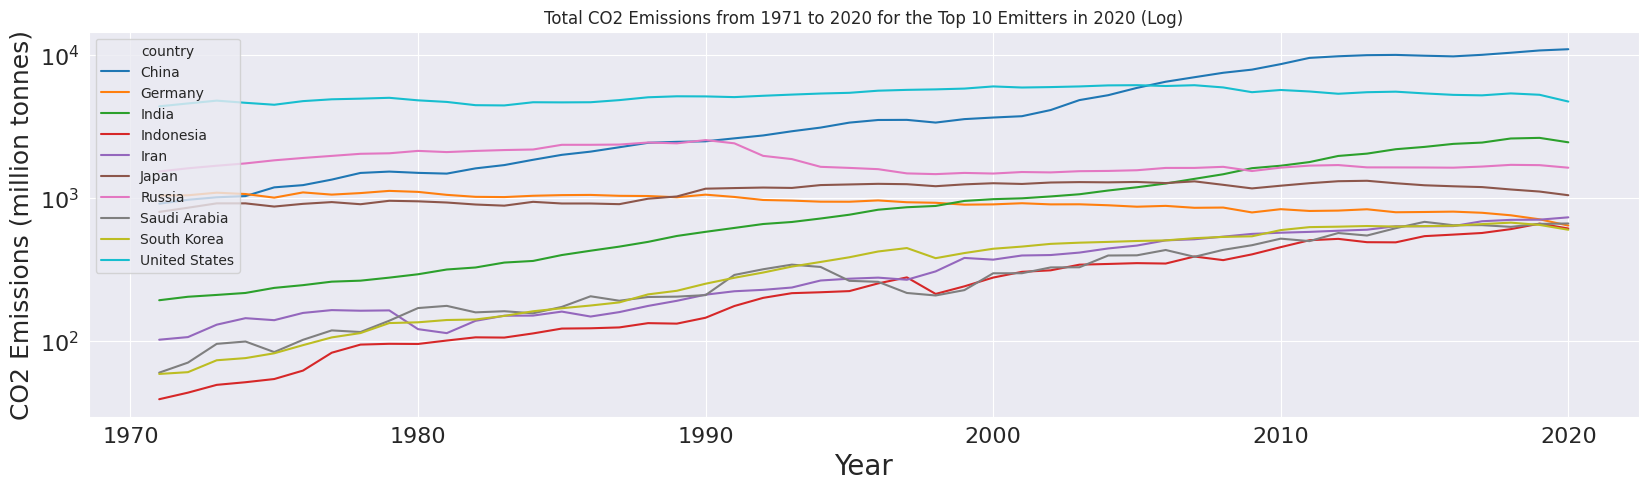

In [200]:
#Plotting the time plot on a log scale
plt.figure(figsize=(20,5))
sns.lineplot(data=df_filtered, x='year', y='co2', hue='country')
#Using log as are y
plt.yscale('log')

#Labeling the x, y axis and title
plt.xlabel('Year', fontsize = 20)
plt.ylabel('CO2 Emissions (million tonnes)', fontsize = 18)
plt.title('Total CO2 Emissions from 1971 to 2020 for the Top 10 Emitters in 2020 (Log)')
plt.tick_params(labelsize = 16)

##### Solution

Using the log scale to graph the top 10 emitters makes it easier to compress the dataset and bring the large and smallest values closer together. As it makes it more visible to the changes that occur throughout the years. Again, the graph in the log scale shows us that China and the US are still the top emitters throughout the years. In addition, as the increase of CO2 emitters is visible, we can see that the mean itself is still relatively low throughout the whole graph. 

##### $\rightarrow$ Comment on the trend in CO$_2$ emissions from these countries over the last 50 years.

##### Solution

In the trend in CO2 emissions from these countries in the last 50 years, we can see a steady increase in CO2 emissions. Looking at the top 10 emitters of the year 2020, highlights valuable insight into the cataphoric increase in CO2 emissions. Again, China alone takes most of the CO2 emissions and leads the most significant amount of CO2 released compared to the other top 10 emitters, especially in the years of the 2000s. When we look at the overall mean of all the countries, we can see a small, steady increase in CO2 emissions as an average. This mean alone is still very small compared to individual values from emitters. Nonetheless, the graphs and data found represent the need for a change and a stop to the growing increase of CO2 emissions. China alone needs more laws and regulations, as well as many other countries too. 